# 05 overpass-turbo.eu comparisons

***18 Aug 2020***

This notebook compares the results of the `gdf_from_XXXX()` functions to results running the same query on https://overpass-turbo.eu.

Note the specific format of the wizard query to limit relations to multipolygon relations:

`(type:node or type:way or (type:relation and type=multipolygon)) and amenity=school in Berlin`

In [1]:
%load_ext autoreload
%autoreload 2

import osmnx as ox # using fork `New geometries module - Work In Progress`
ox.utils.config(use_cache=True, log_console=True)

import matplotlib.pyplot as plt

import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', None)

## Schools in Berlin

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and amenity=school in Berlin`

points:134, lines: 0, poligons:981

In [31]:
%time
# run the query through gdf_from_place and count geometries
berlin_schools = ox.gdf_from_place('Berlin, Germany', tags={'amenity': 'school'})
pberlin_schools.geom_type.value_counts()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


Polygon    981
Point      134
dtype: int64

In [32]:
# Read in the overpass-turbo.eu results and count geometries
ot_berlin_schools = gpd.read_file('overpass-turbo_results/schools_in_berlin.geojson')
ot_berlin_schools.geom_type.value_counts()

Polygon    981
Point      134
dtype: int64

In [46]:
# count the number of ids that are in both data frames
len(set(berlin_schools['unique_id']).intersection(set(ot_berlin_schools['@id'])))

1115

In [34]:
# find ids that are not in both dataframes
set(berlin_schools['unique_id']).symmetric_difference(set(ot_berlin_schools['@id']))

set()

## Hospitals in Ghana

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and amenity=hospital in Ghana`

points:34, lines: 0, poligons:294

In [36]:
%time
# run the query through gdf_from_place and count geometries
ghana_hospitals = ox.gdf_from_place('Ghana', tags={'amenity': 'hospital'})
ghana_hospitals.geom_type.value_counts()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


Polygon         293
Point            34
MultiPolygon      1
dtype: int64

In [37]:
# Read in the overpass-turbo.eu results and count geometries
ot_ghana_hospitals = gpd.read_file('overpass-turbo_results/hospitals_in_ghana.geojson')
ot_ghana_hospitals.geom_type.value_counts()

Polygon         293
Point            34
MultiPolygon      1
dtype: int64

In [45]:
# count the number of ids that are in both data frames
len(set(ghana_hospitals['unique_id']).intersection(set(ot_ghana_hospitals['@id'])))

328

In [39]:
# find ids that are not in both dataframes
set(ghana_hospitals['unique_id']).symmetric_difference(set(ot_ghana_hospitals['@id']))

set()

## Lakes in the Lakes

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and natural=water in 'Lake District National Park'`

points:1, lines: 1, poligons:1143

In [40]:
%%time
# run the query through gdf_from_place and count geometries
lakes_lakes = ox.gdf_from_place('Lake District National Park', tags={'natural': 'water'})
lakes_lakes.geom_type.value_counts()

CPU times: user 2.13 s, sys: 24.1 ms, total: 2.16 s
Wall time: 8.19 s


Polygon         1143
LineString         1
MultiPolygon       1
Point              1
dtype: int64

In [42]:
# Read in the overpass-turbo.eu results and count geometries
ot_lakes_lakes = gpd.read_file('overpass-turbo_results/lakes_in_the_lakes.geojson')
ot_lakes_lakes.geom_type.value_counts()

Polygon         1142
LineString         1
MultiPolygon       1
Point              1
dtype: int64

In [44]:
# count the number of ids that are in both data frames
len(set(lakes_lakes['unique_id']).intersection(set(ot_lakes_lakes['@id'])))

1145

In [47]:
# find ids that are not in both dataframes
set(lakes_lakes['unique_id']).symmetric_difference(set(ot_lakes_lakes['@id']))

{'way/4579452'}

In [55]:
lakes_lakes[lakes_lakes['unique_id'].isin(['way/4579452', 'relation/336078'])]

,unique_id,osmid,element_type,source,geometry,name,waterway,natural,nodes,wikidata,water,is_in:county,is_in:region,is_in:country_code,wikipedia,is_in:national_park,place,alt_name,intermittent,reservoir,landuse,note,abandoned,old_name,source:name,start_date,boat,FIXME,man_made,description,salt,layer,covered,basin,ways,maxspeed,motorboat,source_ref:maxspeed,type,source:more,role,source:water:quality,water:quality,wikimedia_commons,ele,source:maxspeed
18,way/4579452,4579452,way,NaN,"POLYGON ((-3.02306 54.42850, -3.02284 54.42827...",Elter Water,NaN,water,"[570792663, 1163666717, 28930465, 28930464, 11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,relation/336078,336078,relation,Bing,"POLYGON ((-3.02306 54.42850, -3.02284 54.42827...",Elter Water,NaN,water,"[[[570792663, 1163666717, 28930465, 28930464, ...",Q1543979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Elter Water is quite marshy around the edges, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[4579452],NaN,NaN,NaN,multipolygon,OS_Streeview,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

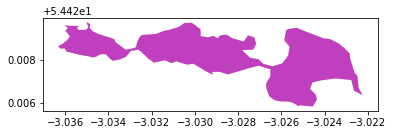

In [58]:
# check the geometries are identical
lakes_lakes[lakes_lakes['unique_id'].isin(['way/4579452', 'relation/336078'])].plot(column='unique_id', cmap='rainbow', alpha=0.5)

Notes:
    
This is a closed way https://www.openstreetmap.org/way/4579452 tagged with natural=water that is the only member of the multipolygon relation https://www.openstreetmap.org/relation/336078 also tagged with natural=water  relation.

`gdf_from_place()` returns these as two separate geometries (one polygon, one multipolygon) both tagged with natural=water - which is strictly true.

Overpass-turbo presumably does some additional work to filter out what is a tagging error - only one of them, the relation or the way should have the tag. I amended the tag on OpenStreetMap.org.

## Religious Rome

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and (landuse=religious or amenity=place_of_worship) in 'Rome'`

points:82, lines: 0, poligons:635

In [60]:
%%time
# run the query through gdf_from_place and count geometries
religious_rome = ox.gdf_from_place('Rome', tags={'landuse': 'religious', 'amenity': 'place_of_worship'})
religious_rome.geom_type.value_counts()

CPU times: user 1.2 s, sys: 12 ms, total: 1.22 s
Wall time: 4.47 s


Polygon         636
Point            82
MultiPolygon      1
dtype: int64

In [61]:
# Read in the overpass-turbo.eu results and count geometries
ot_religious_rome = gpd.read_file('overpass-turbo_results/religious_in_rome.geojson')
ot_religious_rome.geom_type.value_counts()

Polygon         634
Point            82
MultiPolygon      1
dtype: int64

In [62]:
# count the number of ids that are in both data frames
len(set(religious_rome['unique_id']).intersection(set(ot_religious_rome['@id'])))

717

In [63]:
# find ids that are not in both dataframes
set(religious_rome['unique_id']).symmetric_difference(set(ot_religious_rome['@id']))

{'relation/8038348', 'way/111797279'}

https://www.openstreetmap.org/way/111797279 is a building tagged with amenity=place_of_worship

https://www.openstreetmap.org/relation/8038348 is a multipolygon relation tagged with landuse=religious

I'm not sure why these aren't returned by overpass-turbo as well.

<AxesSubplot:>

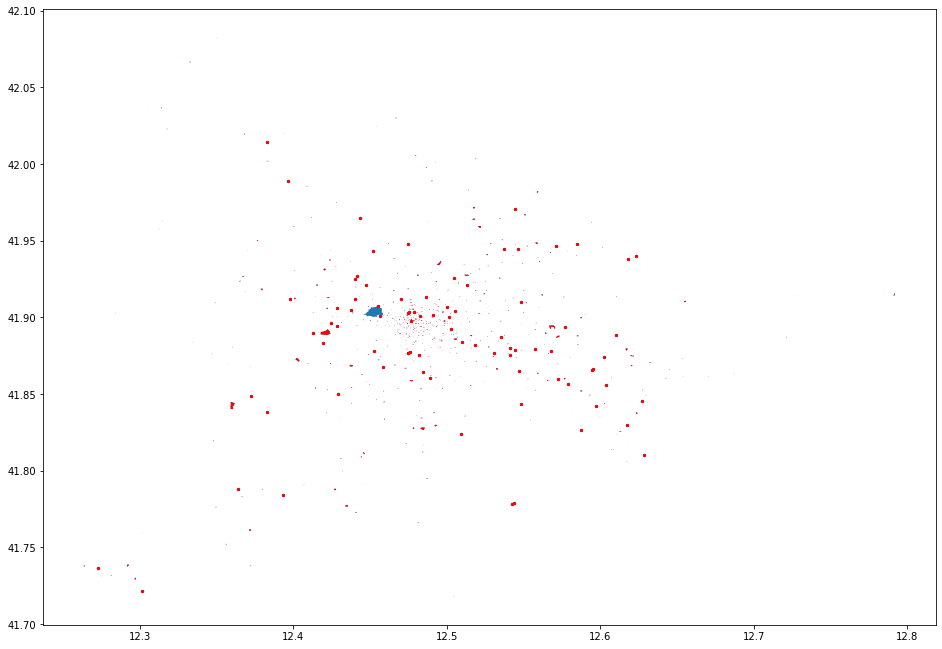

In [91]:
ax = religious_rome.plot(figsize=(16,16), markersize=5)
ot_religious_rome.plot(ax=ax, color='red', markersize=5)

## Living streets in Denmark

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and highway=living_street in 'Denmark'`

points:0, lines: 1858, poligons:0

In [65]:
%%time
# run the query through gdf_from_place and count geometries
living_streets_denmark = ox.gdf_from_place('Denmark', tags={'highway':'living_street'})
living_streets_denmark.geom_type.value_counts()

CPU times: user 1min 8s, sys: 307 ms, total: 1min 9s
Wall time: 2min 49s


LineString    1858
dtype: int64

In [67]:
# Read in the overpass-turbo.eu results and count geometries
ot_living_streets_denmark = gpd.read_file('overpass-turbo_results/living_streets_in_denmark.geojson')
ot_living_streets_denmark.geom_type.value_counts()

LineString    1858
dtype: int64

In [68]:
# count the number of ids that are in both data frames
len(set(living_streets_denmark['unique_id']).intersection(set(ot_living_streets_denmark['@id'])))

1858

In [69]:
# find ids that are not in both dataframes
set(living_streets_denmark['unique_id']).symmetric_difference(set(ot_living_streets_denmark['@id']))

set()

## Buildings in Lubumbashi

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and building=* in 'Lubumbashi'`

points:5, lines: 0, poligons:54745

In [70]:
%%time
# run the query through gdf_from_place and count geometries
buildings_lubumbashi = ox.gdf_from_place('Lubumbashi', tags={'building':True})
buildings_lubumbashi.geom_type.value_counts()

CPU times: user 11.4 s, sys: 357 ms, total: 11.7 s
Wall time: 43.4 s


Polygon    54768
Point          5
dtype: int64

In [71]:
# Read in the overpass-turbo.eu results and count geometries
ot_buildings_lubumbashi = gpd.read_file('overpass-turbo_results/buildings_in_lubumbashi.geojson')
ot_buildings_lubumbashi.geom_type.value_counts()

Polygon    54745
Point          5
dtype: int64

In [72]:
# count the number of ids that are in both data frames
len(set(buildings_lubumbashi['unique_id']).intersection(set(ot_buildings_lubumbashi['@id'])))

54748

***Buildings that are returned by gdf_from_place() but not by overpass-turbo***

Note: these all look pretty straightforward, not sure why they would be omitted.

In [75]:
# find ids that are not in both dataframes
_set = set(buildings_lubumbashi['unique_id']).difference(set(ot_buildings_lubumbashi['@id']))
[('https://www.openstreetmap.org/' + member) for member in _set]

['https://www.openstreetmap.org/way/362346286',
 'https://www.openstreetmap.org/way/363373140',
 'https://www.openstreetmap.org/way/364383211',
 'https://www.openstreetmap.org/way/363130406',
 'https://www.openstreetmap.org/way/363373138',
 'https://www.openstreetmap.org/way/364383172',
 'https://www.openstreetmap.org/way/362346498',
 'https://www.openstreetmap.org/way/364383183',
 'https://www.openstreetmap.org/way/364383241',
 'https://www.openstreetmap.org/way/363130425',
 'https://www.openstreetmap.org/way/363130455',
 'https://www.openstreetmap.org/way/363130400',
 'https://www.openstreetmap.org/way/362346497',
 'https://www.openstreetmap.org/way/363373137',
 'https://www.openstreetmap.org/way/362346501',
 'https://www.openstreetmap.org/way/364383187',
 'https://www.openstreetmap.org/way/364383217',
 'https://www.openstreetmap.org/way/363373141',
 'https://www.openstreetmap.org/way/363373139',
 'https://www.openstreetmap.org/way/363128637',
 'https://www.openstreetmap.org/way/3631

***Buildings that are returned by overpass-turbo but not by gdf_from_place()***

Note: these also look pretty straightforward, not sure why they would be omitted.

In [76]:
# find ids that are not in both dataframes
_set = set(ot_buildings_lubumbashi['@id']).difference(set(buildings_lubumbashi['unique_id']))
[('https://www.openstreetmap.org/' + member) for member in _set]

['https://www.openstreetmap.org/way/360831075',
 'https://www.openstreetmap.org/way/360831089']

Notes:

These look very standard buildings, not sure why they aren't in the geojson

(-11.7, -11.68)

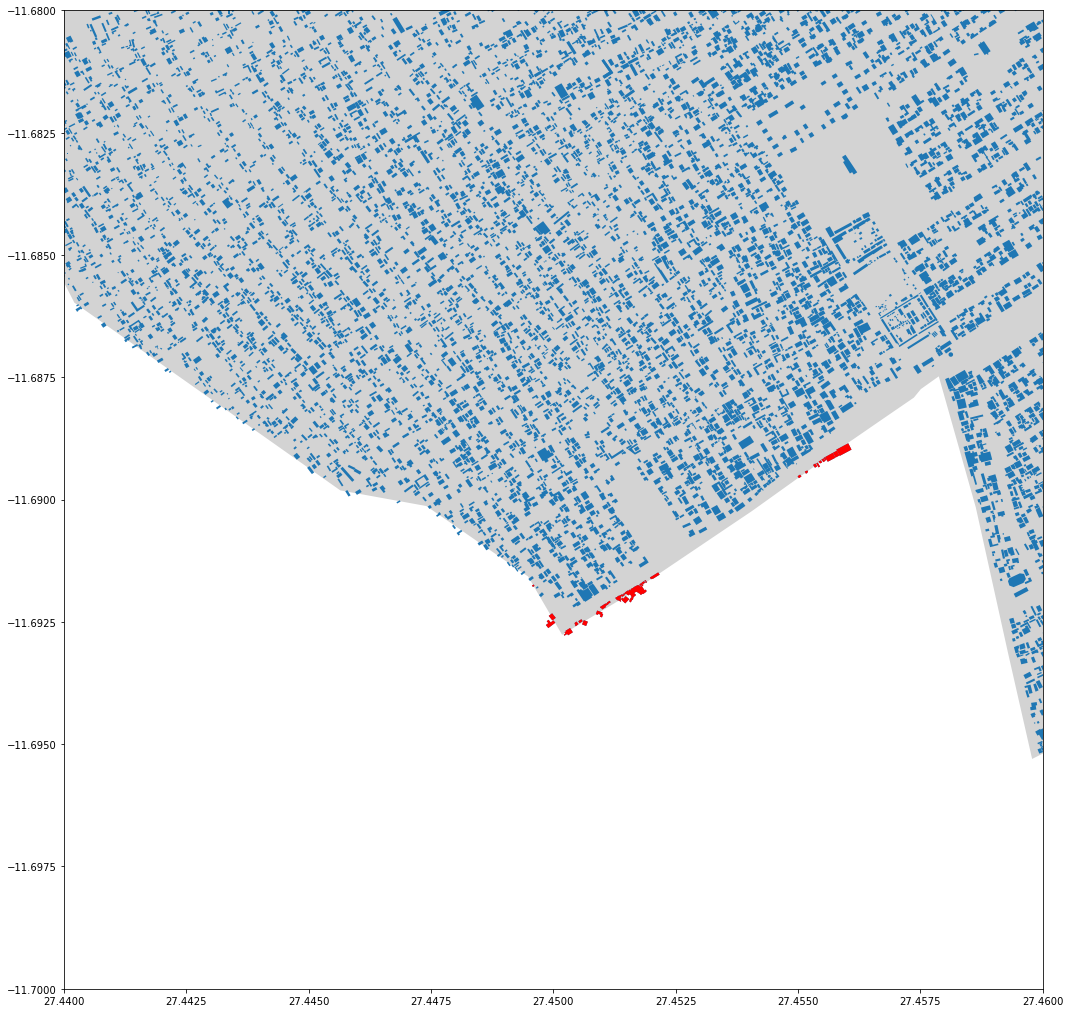

In [89]:
ax = ox.geocode_to_gdf('Lubumbashi').plot(figsize=(18,18), color='lightgrey')
buildings_lubumbashi.plot(ax=ax)
buildings_lubumbashi[~buildings_lubumbashi['unique_id'].isin(ot_buildings_lubumbashi['@id'])].plot(ax=ax, color='red')

ax.set_xlim(left=27.44, right=27.46)
ax.set_ylim(top=-11.68, bottom=-11.70)

Note:

- These few buildings lie along one edge of the boundary
- They do intersect with the boundary so should be included
- The boundary is not shown overlapping the buildings on OSM https://www.openstreetmap.org/relation/5399777#map=16/-11.6907/27.4569

Seems to be an issue with the boundary though not sure why. Differing cached versions? Buffering? Projection issue? Nevertheless `gdf_from_place()` seems to be working as expected.